量子AI入門（１．３．８）　2量子ビット回路

**2量子ビットの量子コンピューティング**

-from qiskit import QuantumCircuit\
量子回路を構築するためのクラス。\
このクラスを使って量子ビット（量子ビットの状態）や古典ビット（測定結果を記録するビット）を操作します。

-from qiskit_aer import StatevectorSimulator, AerSimulator\
●StatevectorSimulator:\
　✓量子状態ベクトルを計算するシミュレーター。\
　✓量子回路の状態を正確に追跡し、量子ビットの状態ベクトルを返します。\
●AerSimulator:\
　✓実行可能な量子回路をシミュレートする一般的なシミュレーター。\
　✓実機のノイズを再現する設定も可能で、実行結果（測定結果など）を取得できます。

-from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager\
量子回路を実行する際に対象デバイス（またはシミュレーター）に適合させるために回路を最適化する「パスマネージャ」を生成します。\
トランスパイル（変換）とは、例えば以下を含みます：\
・論理的な量子ゲートを物理的なゲートに置き換える。\
・実機に依存する制約（接続性やノイズモデル）を考慮する。\
・実行時間を短縮するように回路を再構成する。

-from qiskit_ibm_runtime import SamplerV2 as Sampler\
"SamplerV2"は量子回路をIBMの量子コンピュータやシミュレーターで実行し測定結果をサンプリングする機能を提供\します。
主に次のような場面で利用します：\
・実機やシミュレーターでの計算結果を取得する。\
・測定の確率分布や期待値を計算する。

-from qiskit.visualization import plot_bloch_multivector\
"qiskit.visualization"は量子回路や測定結果、量子状態などを可視化します。\
●plot_bloch_multivector\
量子状態をブロッホ球（Bloch Sphere）に可視化するための関数です。この関数は通常、シミュレーターで量子状態ベクトルを取得した後に使用します。

【Qiskitライブラリのインポート】

In [ ]:
# Import the qiskit library
#量子ビット
from qiskit import QuantumCircuit

#シミュレータ
from qiskit_aer import StatevectorSimulator

#ブロッホ球表示
from qiskit.visualization import plot_bloch_multivector

#シミュレータとパスマネージャとサンプラとグラフ化
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

**例題４　Hゲートによる２量子ビットの重ね合わせ状態**

In [ ]:
#例題４　Hゲートによる２量子ビットの重ね合わせ状態
#量子ビットと古典ビットをそれぞれ2つずつ用意
circuit = QuantumCircuit(2,2) #２量子ビット、２古典ビットを準備

#量子回路を表示
circuit.draw(output="mpl")

In [ ]:
#それぞれの量子ビットにアダマールゲート（Hゲート）を施す
circuit.h(0)
circuit.h(1)

#量子回路を表示
circuit.draw(output="mpl")

In [ ]:
#2量子ビットを測定したら、ｑ₁を古典レジスタの０番目、ｑ₀を古典レジスタの１番目に入れる
circuit.measure(1,0)
circuit.measure(0,1)

#量子回路を表示
circuit.draw(output="mpl")

In [ ]:
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

#結果の表示
print(result)

In [ ]:
#ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**例題５　CNOTゲートによる量子もつれ状態生成**

q₀にHゲートを施してCNOTゲートで量子もつれ

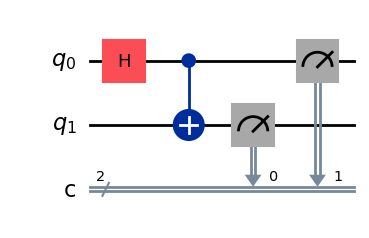

In [35]:
#例題５－１ q₀にHゲートを施してCNOTゲートで量子もつれ
#量子ビットと古典ビットをそれぞれ2つずつ用意
circuit = QuantumCircuit(2,2)

#★☆★ Hゲート CNOTゲート ☆★☆
circuit.h(0)
circuit.cx(0,1)

#測定
circuit.measure(1,0)
circuit.measure(0,1)

#量子回路を表示
circuit.draw(output="mpl")

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


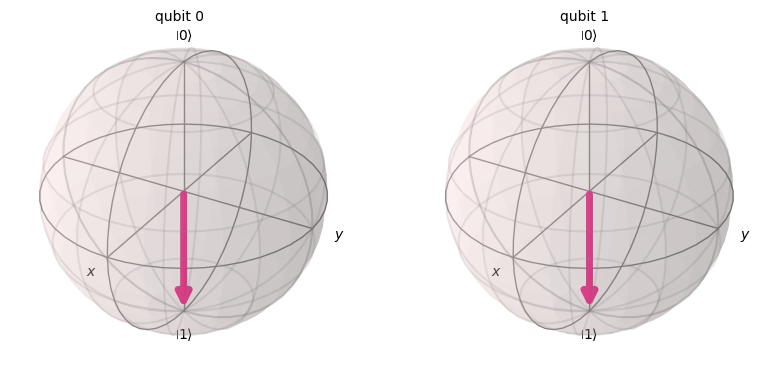

In [36]:
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

 > Counts: {'00': 502, '11': 522}


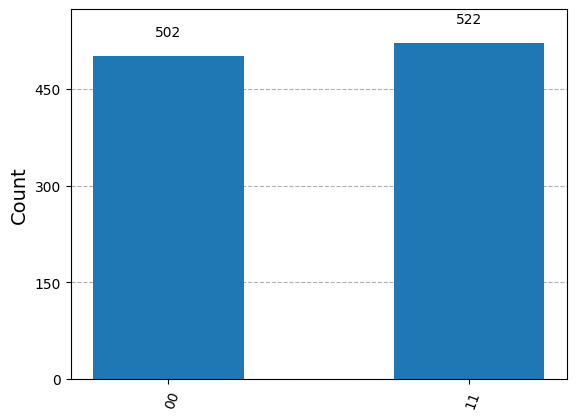

In [37]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

q₀にHゲートを、q₁にXゲートを施してCNOTゲートで量子もつれ

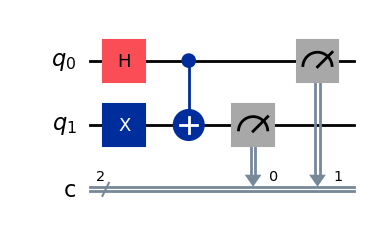

In [38]:
#例題５－２ q₀にHゲートを、q₁にXゲートを施してCNOTゲートで量子もつれ
#量子ビットと古典ビットをそれぞれ2つずつ用意
circuit = QuantumCircuit(2,2)

#★☆★ Hゲート Xゲート CNOTゲート ☆★☆
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)

#測定
circuit.measure(1,0)
circuit.measure(0,1)

#量子回路を表示
circuit.draw(output="mpl")

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


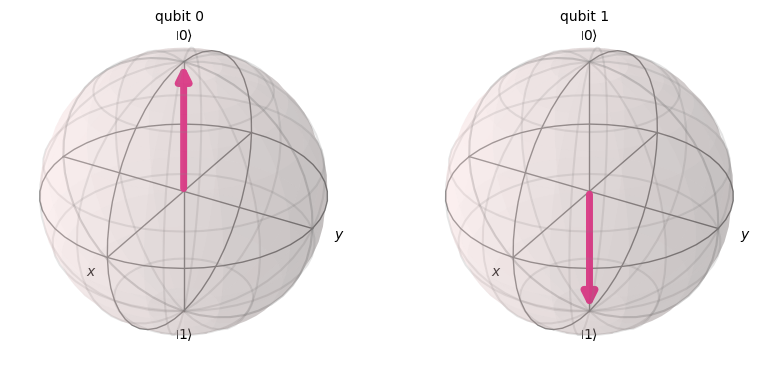

In [39]:
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

 > Counts: {'10': 503, '01': 521}


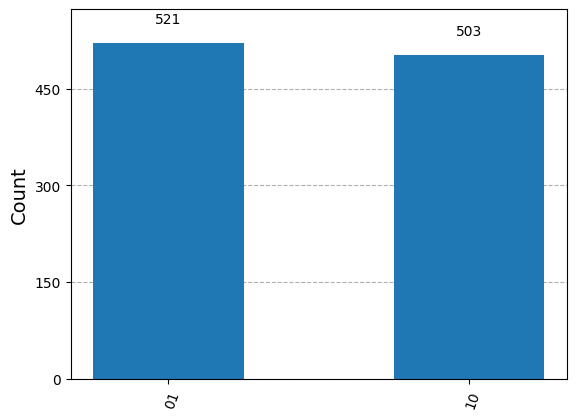

In [40]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**例題６　CNOTゲートを使ったSWAPゲート**

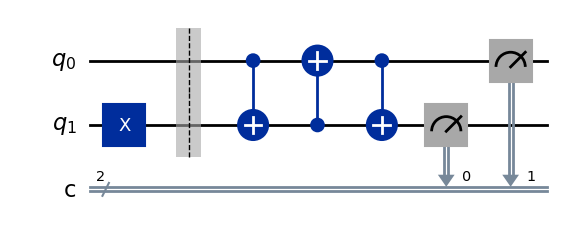

In [43]:
#例題６ CNOTゲートを使ったSWAPゲート
#量子ビットと古典ビットを数を表す変数bn
bn = 2
#量子ビットと古典ビットをbn個準備
circuit = QuantumCircuit(bn,bn)

#★☆★ Xゲート ☆★☆
circuit.x(1)

#区切り符号 引数は無し
circuit.barrier()

#★☆★ CNOTゲート×3 ☆★☆
circuit.cx(0,1)
circuit.cx(1,0)
circuit.cx(0,1)

#測定
for i in range(bn):
    circuit.measure(bn-1-i,i)

#量子回路を表示
circuit.draw(output="mpl")

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


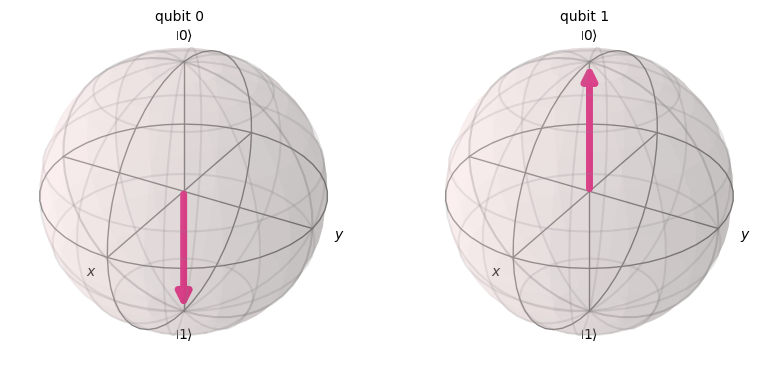

In [44]:
#状態ベクトルシミュレータを準備
backend = StatevectorSimulator()

#状態ベクトルシミュレータを準備
result = backend.run(circuit).result().get_statevector(circuit, decimals=3)

#結果の表示
print(result)

#ブロッホ球の表示
plot_bloch_multivector(result)

 > Counts: {'10': 1024}


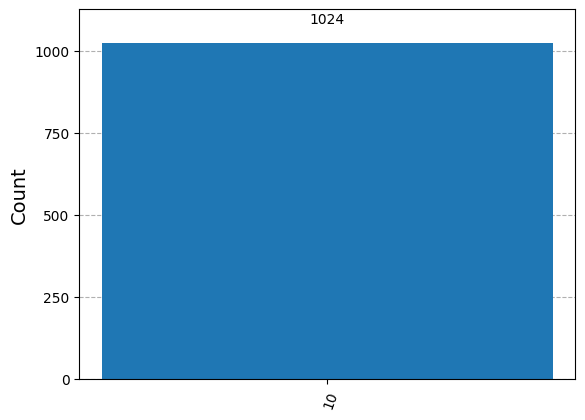

In [45]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(circuit)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )